


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
! pip install fredapi --quiet

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('max_columns', 500)
plt.style.use('fivethirtyeight')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
from fredapi import Fred

In [3]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
fred_key = user_secrets.get_secret("FRED API")

## 1. Create the FRED object

In [4]:
fred = Fred(api_key= fred_key)
fred

## 2. Search for economic data

In [5]:
SP500 = fred.search('S&P', order_by = "popularity")
SP500.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-03-03,2023-03-03,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-03-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-03-03 09:33:09-06:00,94,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-03-03,2023-03-03,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-02-28 08:02:02-06:00,92,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-03-03,2023-03-03,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-03-02,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-03-03 09:33:13-06:00,84,This data represents the effective yield of th...
SP500,SP500,2023-03-03,2023-03-03,S&P 500,2013-03-04,2023-03-02,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-03-02 19:10:52-06:00,84,The observations for the S&P 500 represent the...
CSUSHPISA,CSUSHPISA,2023-03-03,2023-03-03,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-02-28 08:02:04-06:00,83,"For more information regarding the index, plea..."


## 3. Pull and plot the series data

In [6]:
sp500 = fred.get_series(series_id = 'SP500')

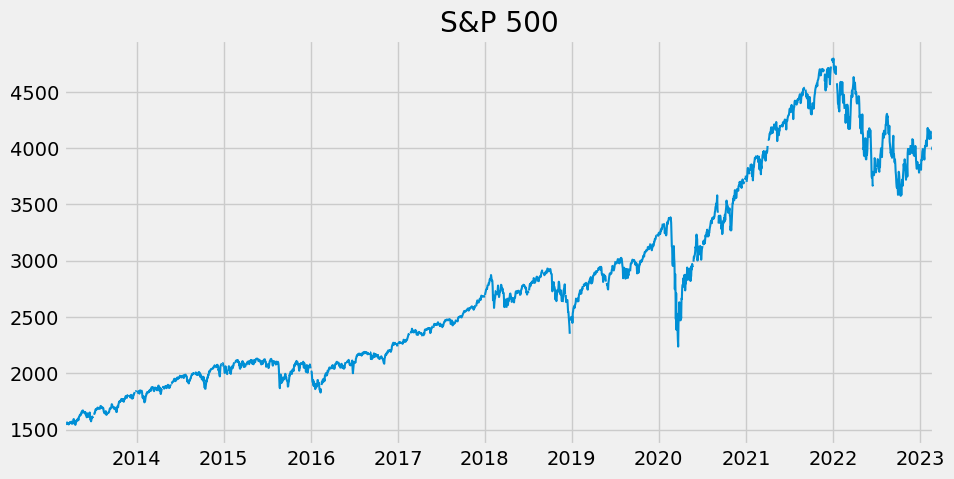

In [7]:
sp500.plot(figsize = (10,5), title = 'S&P 500', lw = 1.5)
plt.show()

## 4. Pull and join multiple data

In [8]:
unemp_results = fred.search('unemployement')
unemp_results.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-03-03,2023-03-03,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:02-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-03-03,2023-03-03,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-03 07:43:02-06:00,58,The unemployment rate represents the number of...
NROU,NROU,2023-03-03,2023-03-03,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,70,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2023-03-03,2023-03-03,Unemployment Level,1948-01-01,2023-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-02-03 07:44:05-06:00,70,The series comes from the 'Current Population ...
CCSA,CCSA,2023-03-03,2023-03-03,Continued Claims (Insured Unemployment),1967-01-07,2023-02-18,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-03-02 07:41:03-06:00,73,"Continued claims, also referred to as insured ..."


In [9]:
unrate = fred.get_series(series_id = 'UNRATE')

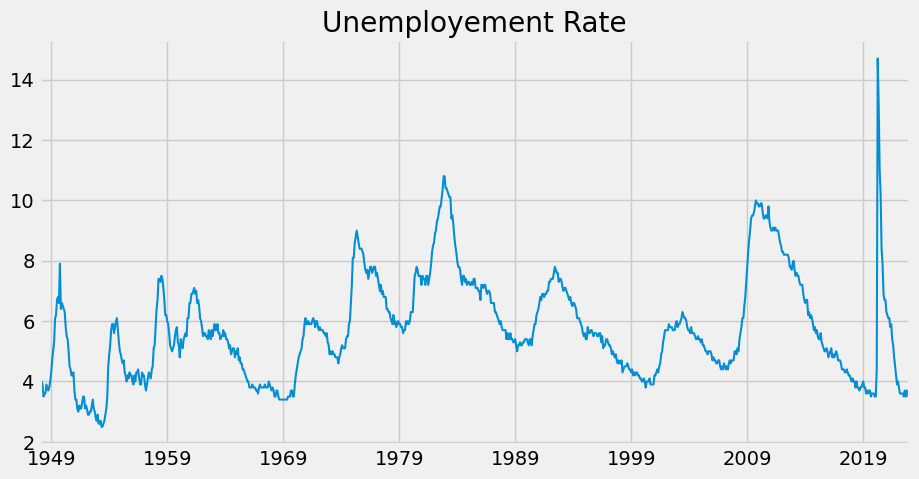

In [10]:
unrate.plot(figsize = (10,5), title = 'Unemployement Rate', lw  = 1.5)
plt.show()

In [11]:
fred.search('unemployement rate state', filter=('frequency', 'Monthly'))

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-03-03,2023-03-03,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:02-06:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-03-03,2023-03-03,Unemployment Rate,1948-01-01,2023-01-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-02-03 07:43:02-06:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2023-03-03,2023-03-03,Unemployment Level,1948-01-01,2023-01-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-02-03 07:44:05-06:00,70,The series comes from the 'Current Population ...
U6RATE,U6RATE,2023-03-03,2023-03-03,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:13-06:00,67,The series comes from the 'Current Population ...
LNS14000006,LNS14000006,2023-03-03,2023-03-03,Unemployment Rate - Black or African American,1972-01-01,2023-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-02-03 07:44:12-06:00,65,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TOPE820UR,TOPE820UR,2023-03-03,2023-03-03,"Unemployment Rate in Topeka, KS (MSA)",1990-01-01,2022-12-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2023-02-01 13:32:24-06:00,1,None
KILL648UR,KILL648UR,2023-03-03,2023-03-03,"Unemployment Rate in Killeen-Temple, TX (MSA)",1990-01-01,2022-12-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2023-02-01 13:31:34-06:00,1,None
DESM719UR,DESM719UR,2023-03-03,2023-03-03,Unemployment Rate in Des Moines-West Des Moine...,1990-01-01,2022-12-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2023-02-01 13:32:48-06:00,1,None
